<font size=7>LFP Animations

This notebook explains how to create animations of the raw waveforms from various tissue recordings. These animations allow us to see the wave patterns flow through various parts of the tissue. For this tutorial we will consider the ?anterior? CA1 recording (UUID: 2023-04-02-e-hc328_unperturbed). I reccomned creating a new notebook for each dataset you choose to analyze.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
import pickle

from human_hip.lfp import get_brain_waves
from human_hip.spike_data import raster_fancy_plot, read_phy_files
from scipy.signal import hilbert, chirp

# <font color="blue"> Data Overview

We load the spike data in order to inspect the portion of the recording that we will analyze. From the raw data file name, `raw_start120s_stop130s_fs1ms.pkl`, we see that the recording goes from 120-130 seconds. Looking at the raster, we see that the most activity is between 122-125 seconds, thus we will create our animation there.

In [27]:
sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')



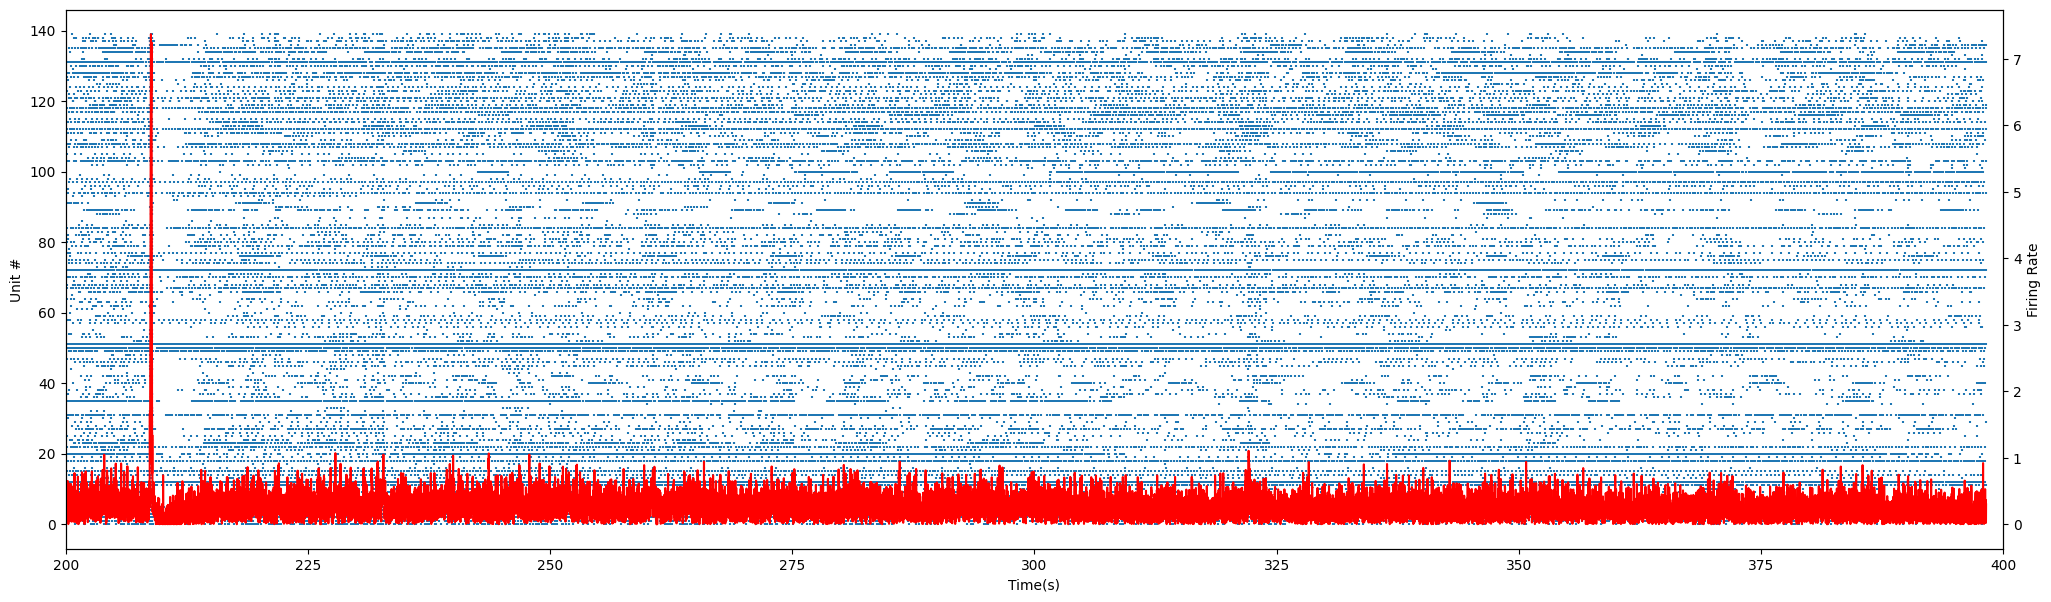

In [56]:
raster_fancy_plot(sd, xsize=25, ysize=7, start_time=200, stop_time=400)

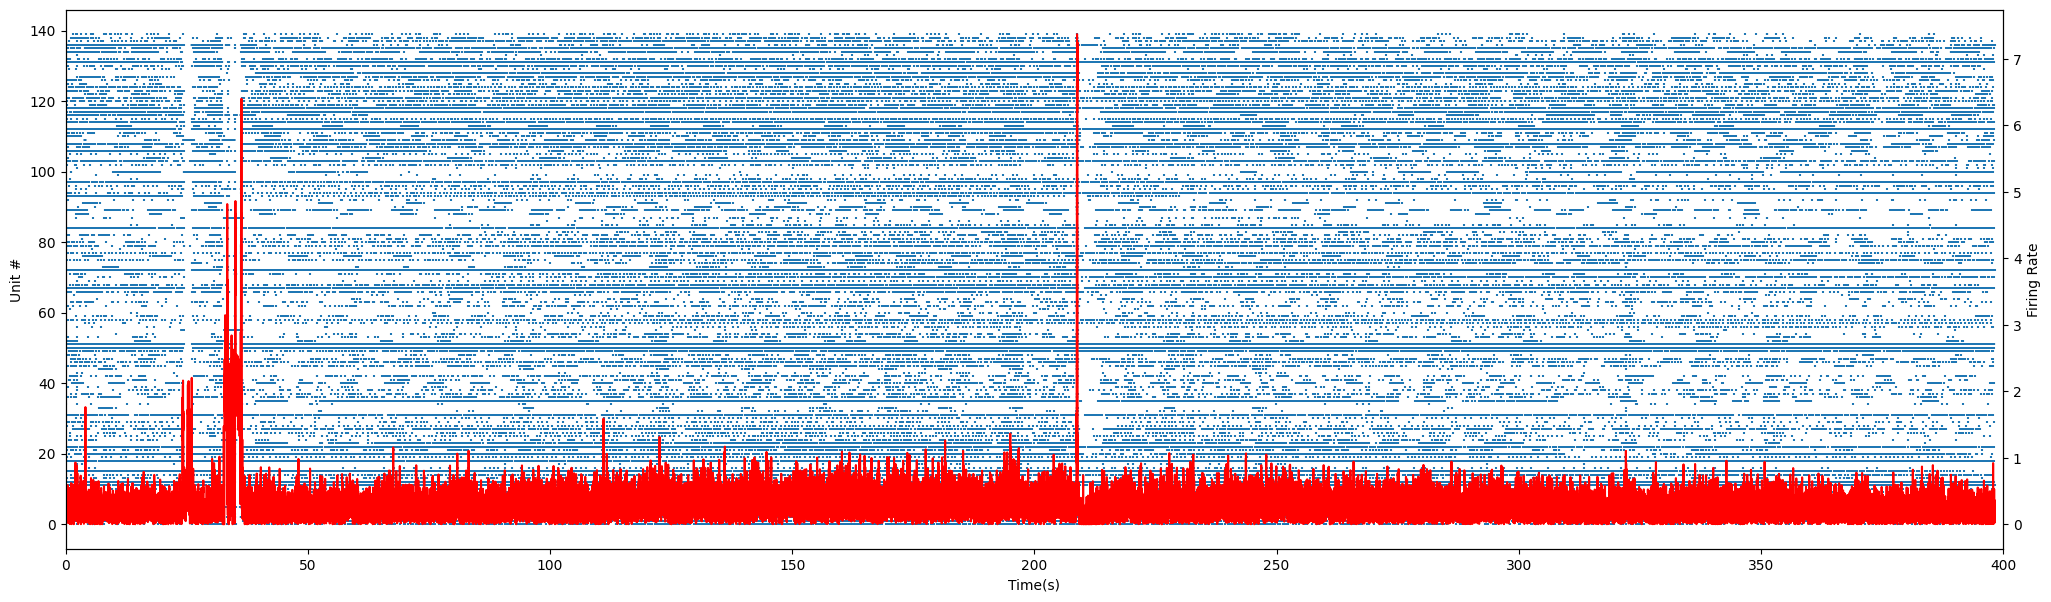

In [58]:
raster_fancy_plot(sd, xsize=25, ysize=7, start_time=0, stop_time=15)

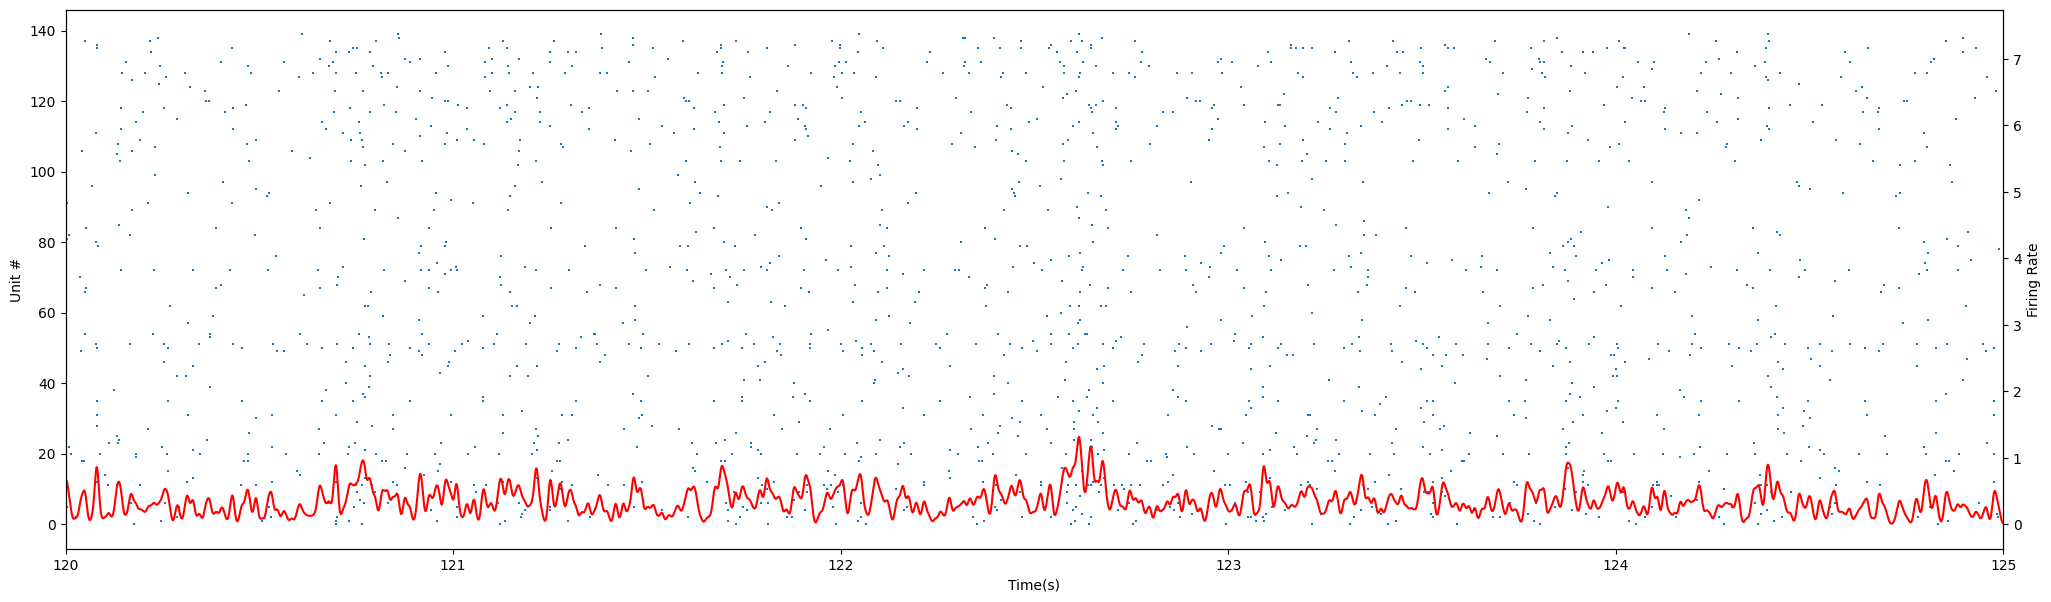

In [65]:
raster_fancy_plot(sd, xsize=25, ysize=7, start_time=120, stop_time=125)

Next we load in the raw data. We can look at the electrode map of the dataset.

In [30]:
# load raw data
file = open("/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start120s_stop130s_fs1ms.pkl", 'rb')
data_pkl = pickle.load(file)
file.close()

data_pkl.keys()

dict_keys(['data', 'xy', 'frame_rate'])

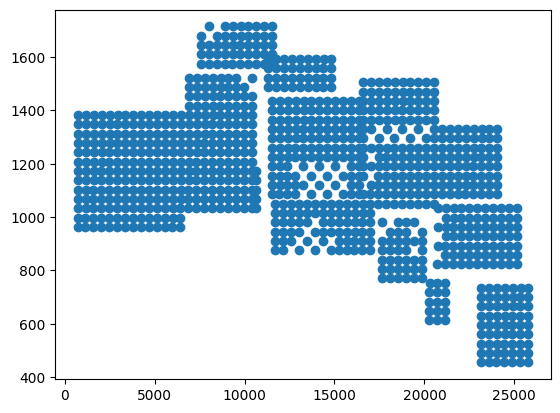

In [31]:
x = data_pkl['xy'][:,0]                                             # x and y  coordinates
y = data_pkl['xy'][:,1]
plt.scatter( x , y )

We use the function `get_brain_waves` to look at the various frequencies that neuroscientists care about. See `2_basic_analysis` for a more thorough description of this. Below we plot a few arbitrarily chosen electrodes at a specific frequency. I reccomend changing the code to see what different frequencies look like. Then you can decided what frequency band and time window you'd like to use for animations.

In [32]:
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves
data_pkl["frame_rate"]


1000.0

(972, 10000)
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 2

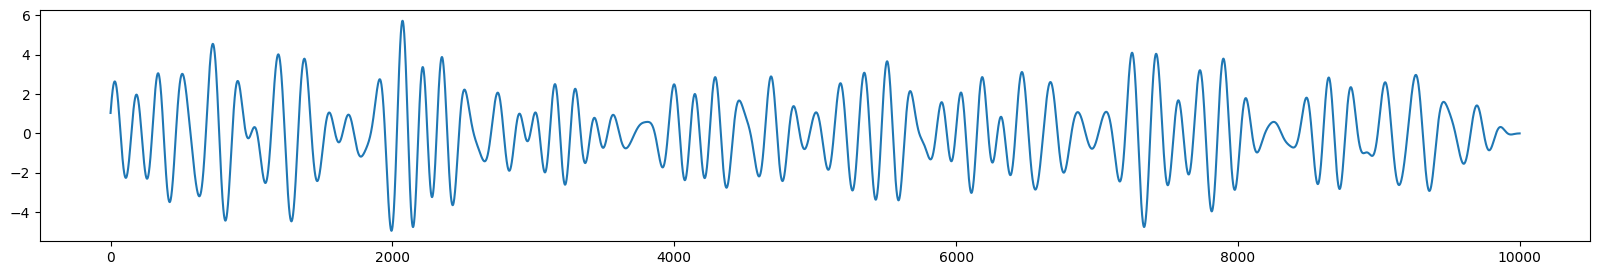

100


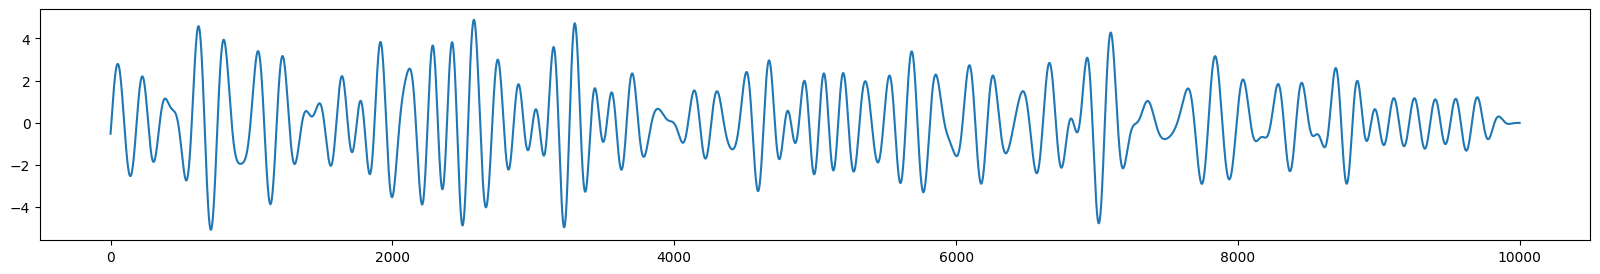

200


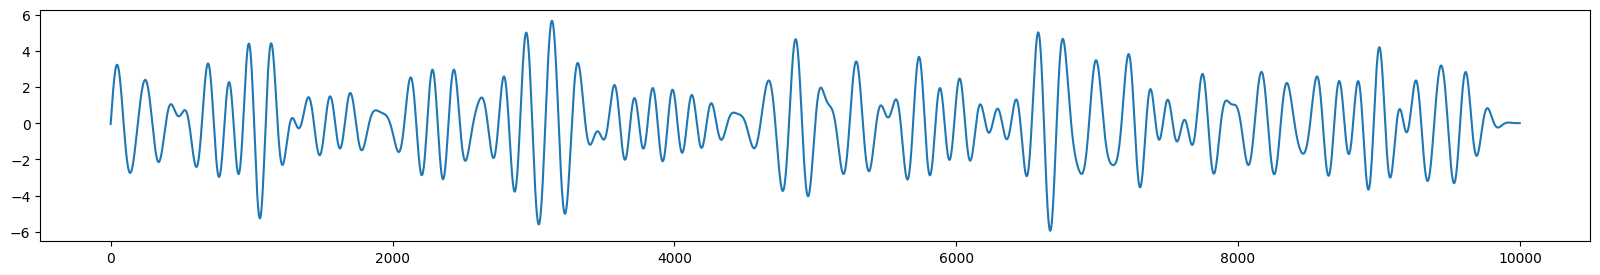

300


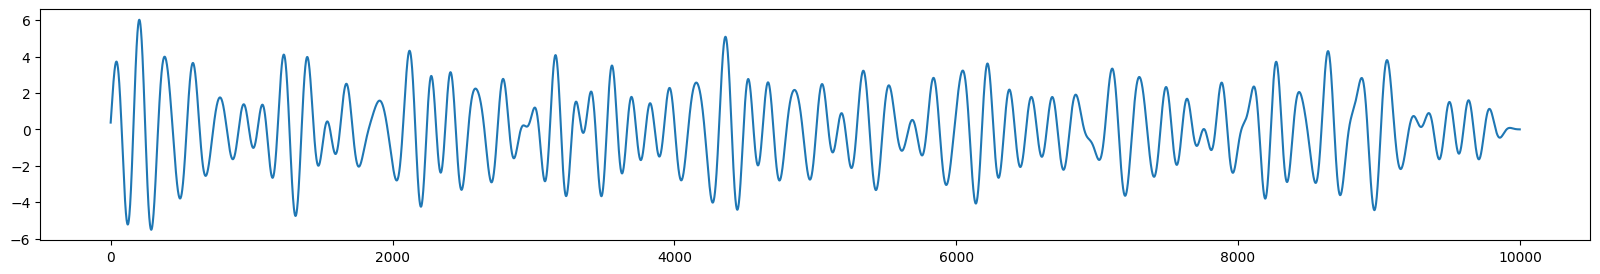

400


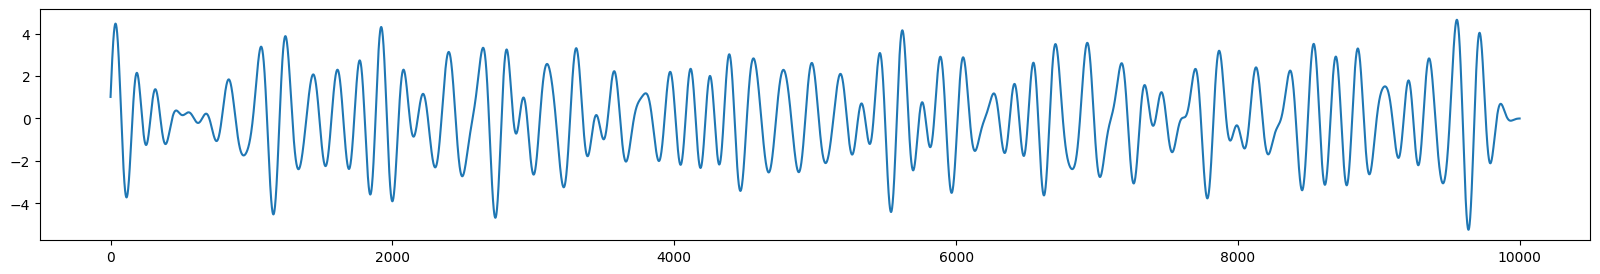

500


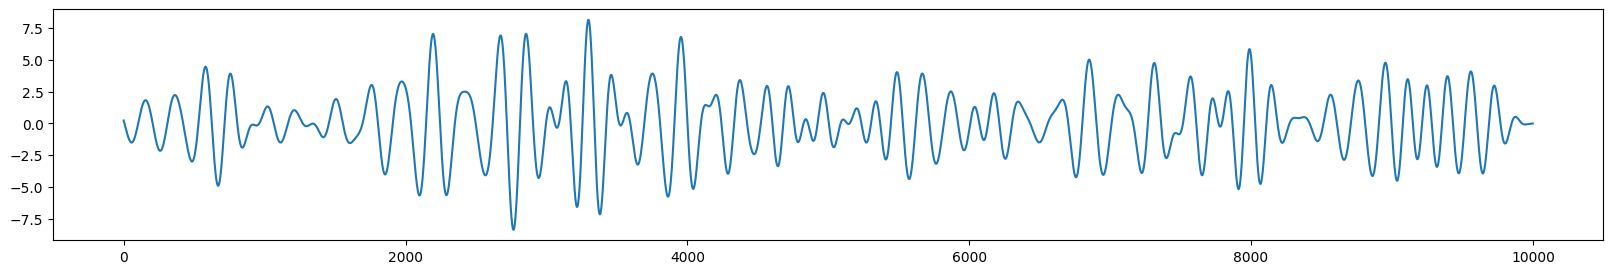

In [33]:
# plot scatter of the "basic" frequency of 6 electrodes
print(waves["basic"].shape)
print(*range(waves["basic"].shape[1]))
for i in range(0,600,100):
    print(i)
    plt.figure(figsize=(20,3))
    #plt.plot( [*range(waves["basic"].shape[1])], waves["alpha"][i,:] )
    plt.plot( [*range(waves["basic"].shape[1])], waves["theta"][i,:] )
    #plt.plot( [*range(waves["basic"].shape[1])], waves["beta"][i,:] )
    plt.show()
    #plt.xlim(2000,3000)

# <font color="blue"> Animations

## <font color="blue"> Waveform Animations

[reference code](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

(972, 10000)


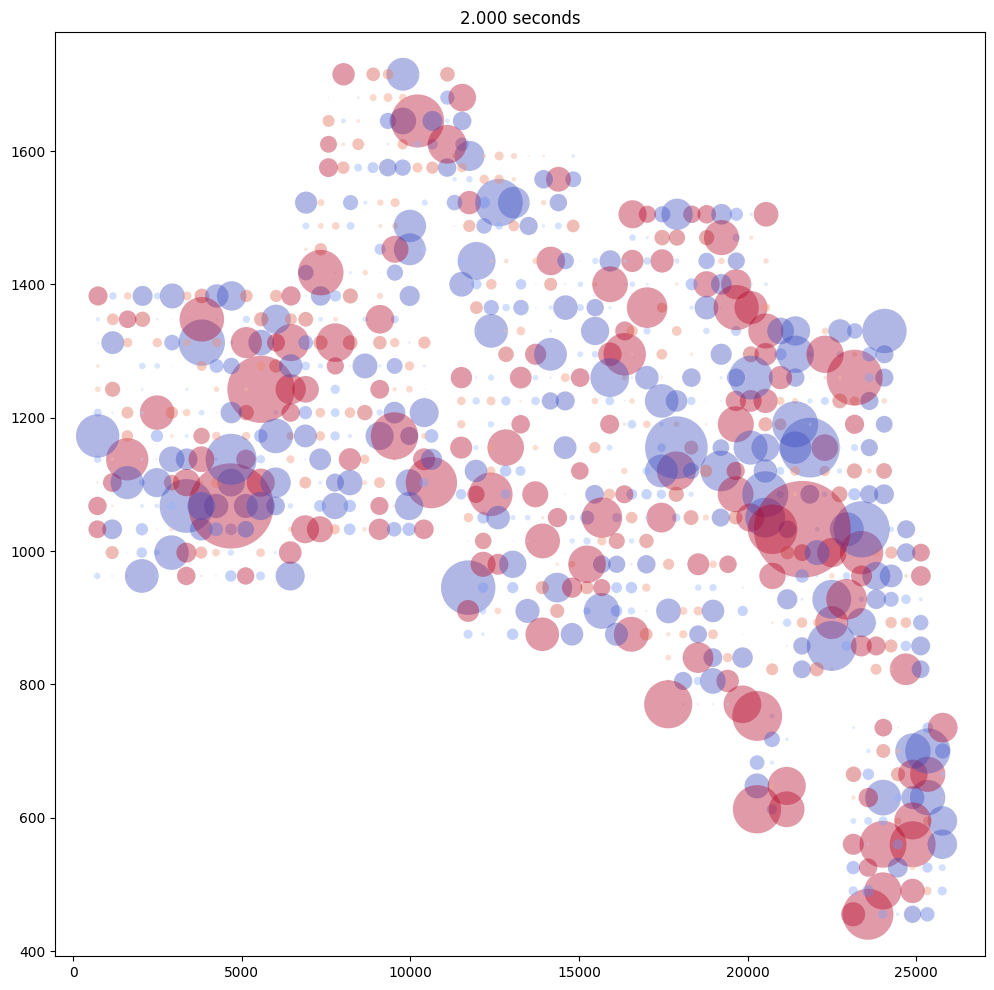

In [34]:
### Long Alpha Animation
# ca1_alpha_start2700_stop5700_step1
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["alpha"] 
print(data.shape)


hilbert_transform = np.abs(hilbert(data[:, 0]))
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    scatter._sizes = (np.abs(data[:,i])**2.3)*80
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

#call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 1), interval=100, blit=False)  #5700





In [35]:
anim.save("dev/other/daniel/media/alpha_waves.mp4")

In [36]:
len(range(2500, 3000, 3)) * 100/ 1000

16.7

## <font color="blue"> Instantaneous phase

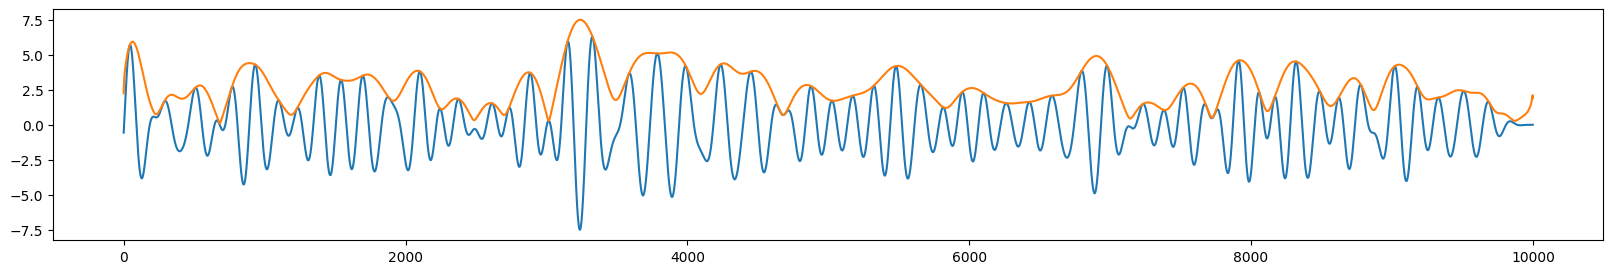

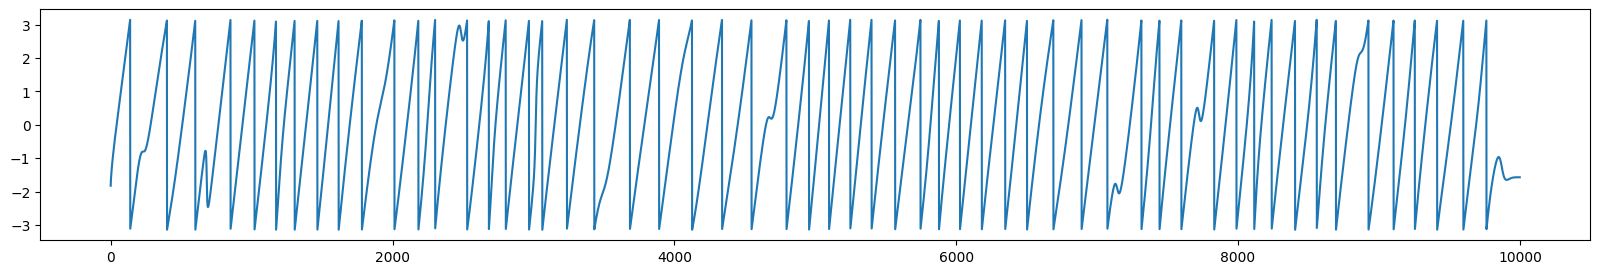

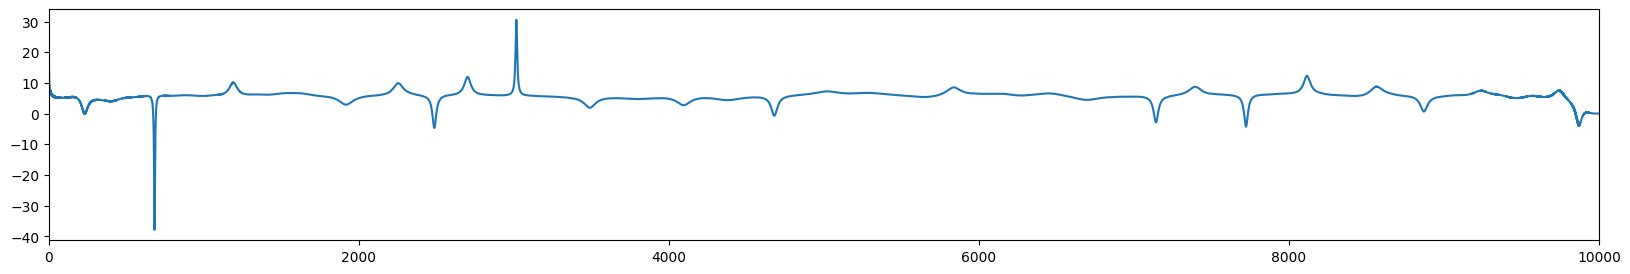

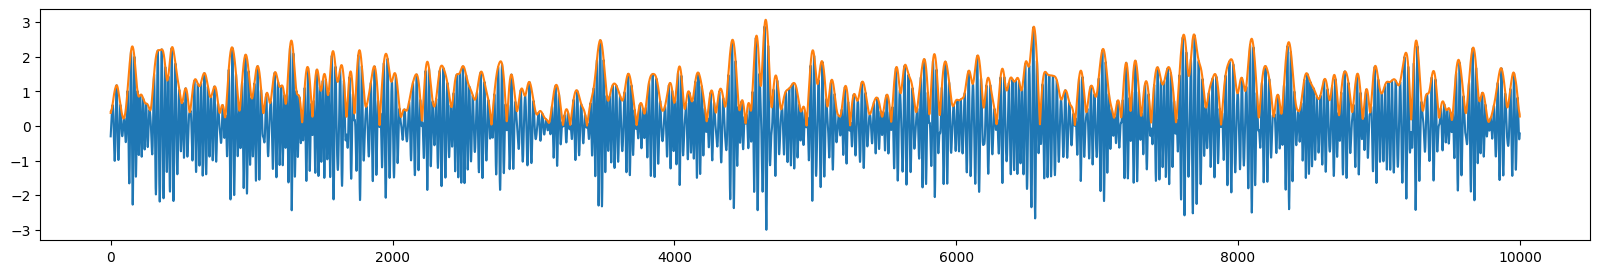

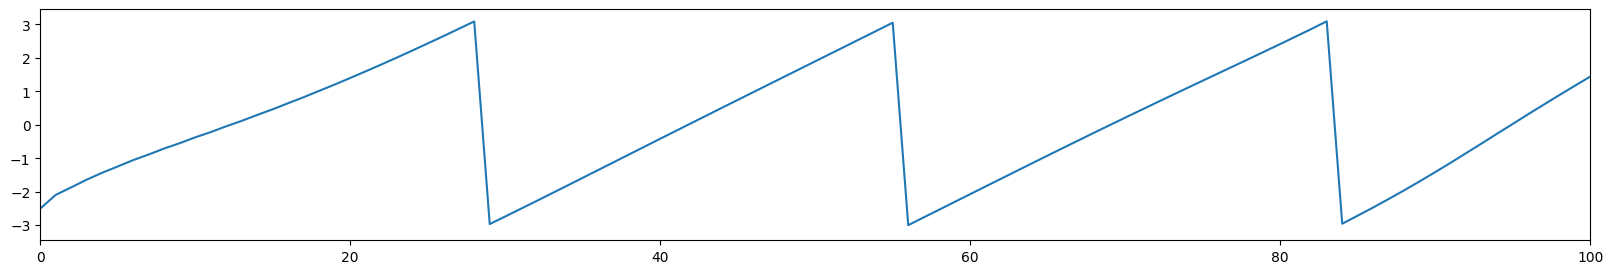

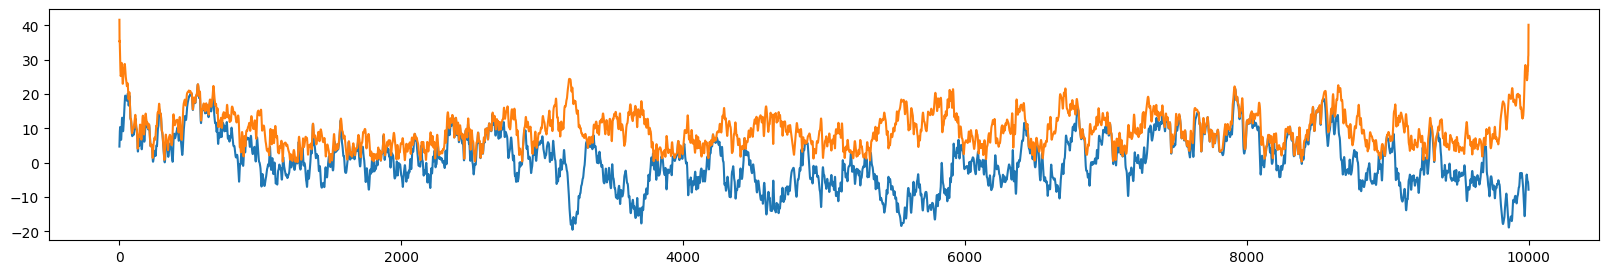

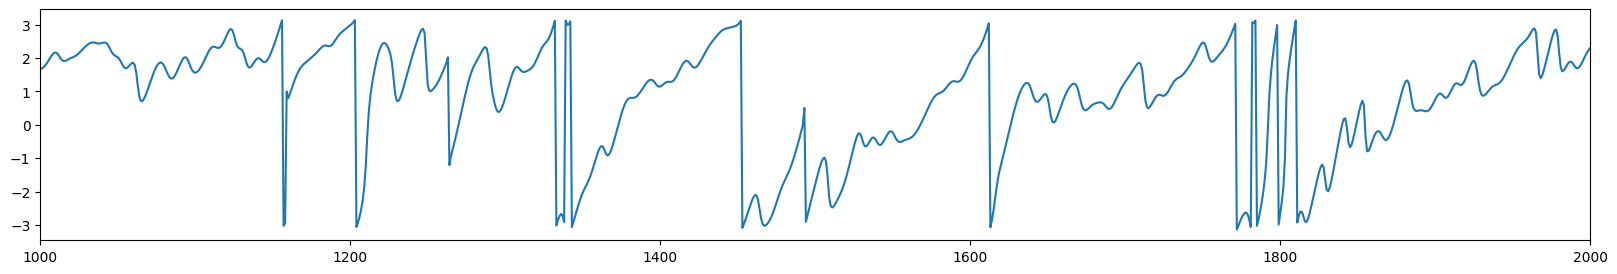

In [37]:
###Envelope of the theta waves of 1 electrode
theta_wave = waves["theta"][1,:]
complex_theta_wave = hilbert(theta_wave)
plt.figure(figsize=(20,3))
plt.plot( [*range(waves["basic"].shape[1])], theta_wave )
plt.plot( [*range(waves["basic"].shape[1])], np.abs(complex_theta_wave))
plt.show()

###Instantaneous phase of the theta waves of 1 electrode
inst_phase = np.angle(complex_theta_wave)
plt.figure(figsize=(20,3))
plt.plot(inst_phase) #[*range(waves["basic"].shape[1])]
plt.show()

###Instantaneous frequency of the theta waves of 1 electrode
inst_freq = np.diff(np.unwrap(inst_phase))/(2*np.pi)*1000 #inst frequency
plt.figure(figsize=(20,3))
plt.plot(inst_freq) #[*range(waves["basic"].shape[1])]
plt.xlim(0,10000)
plt.show()

###Envelope of the gamma waves of 1 electrode
gamma_wave = waves["gamma"][1,:]
complex_gamma_wave =hilbert(gamma_wave)
plt.figure(figsize=(20,3))
plt.plot( [*range(waves["basic"].shape[1])], gamma_wave)
plt.plot( [*range(waves["basic"].shape[1])], np.abs(complex_gamma_wave))
plt.show()

###Instantaneous phase of the gamma waves of 1 electrode
inst_phase = np.angle(complex_gamma_wave)
plt.figure(figsize=(20,3))
plt.plot( inst_phase ) #[*range(waves["basic"].shape[1])], 
plt.xlim(0,100)
plt.show()

###Envelope of the basic waves of 1 electrode
basic_wave = waves["basic"][1,:]
complex_basic_wave =hilbert(basic_wave)
plt.figure(figsize=(20,3))
plt.plot( [*range(waves["basic"].shape[1])], basic_wave)
plt.plot( [*range(waves["basic"].shape[1])], np.abs(complex_basic_wave))
plt.show()

###Instantaneous phase of the gamma waves of 1 electrode
inst_phase = np.angle(complex_basic_wave)
plt.figure(figsize=(20,3))
plt.plot( inst_phase ) #[*range(waves["basic"].shape[1])], 
plt.xlim(1000,2000)
plt.show()


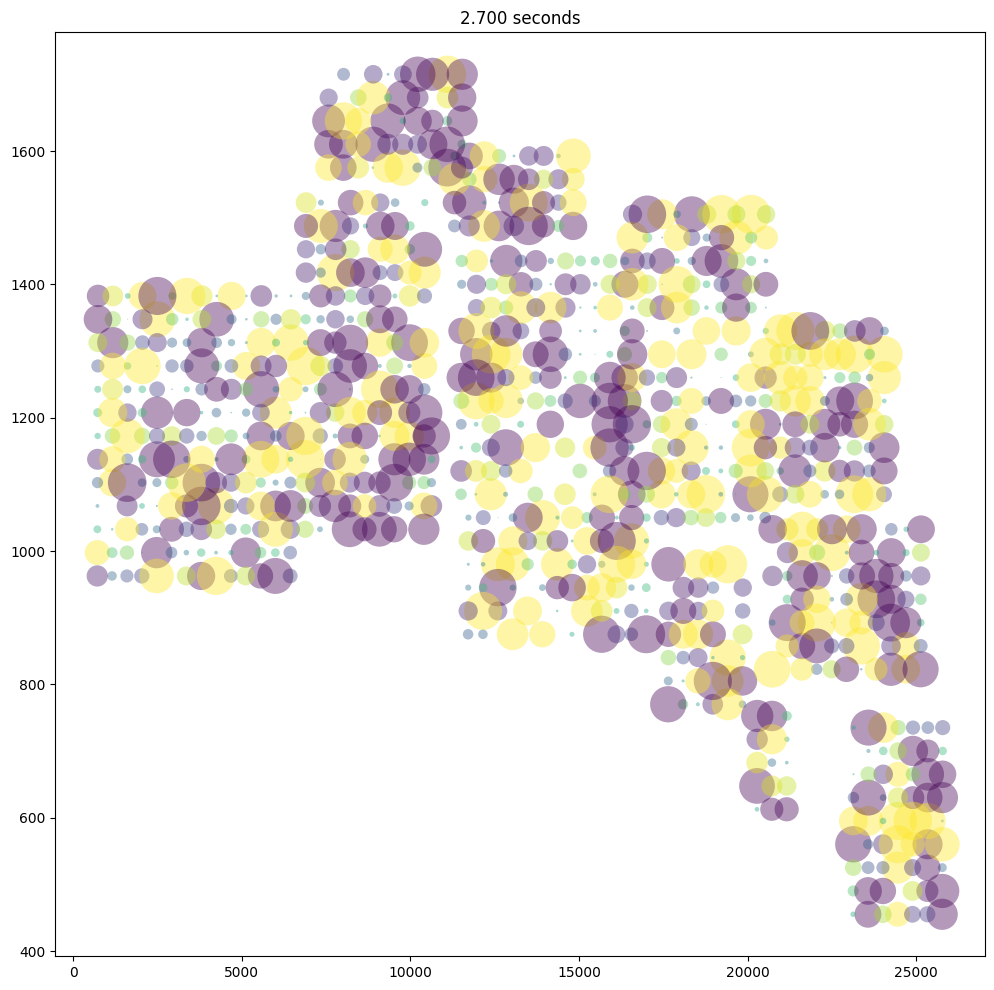

In [59]:
### Theta Waves instantaneous phase Animation ###
## ca1_theta_start2000_stop3000_step3
 # First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
theta_wave = waves["theta"]
complex_theta_wave = hilbert(theta_wave)
inst_phase = np.angle(complex_theta_wave)
norm = plt.Normalize( vmin= np.mean(inst_phase)-np.std(inst_phase), vmax= np.mean(inst_phase)+np.std(inst_phase) )
scatter = ax.scatter( x, y, c=inst_phase[:,0] , norm=norm, cmap=cm.viridis, s=(np.abs(inst_phase[:,0])**1.8)*100 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,


# animation function.  This is called sequentially
def animate(i):
     scatter.set_array(inst_phase[:,i])
     scatter._sizes = (np.abs(inst_phase[:,i])**1.8)*100
     ax.set_title(f"{i/1000:.3f} seconds")
     return scatter

anim = FuncAnimation(fig, animate, frames=range(2700, 5000, 5), interval=100, blit=False)

In [60]:
anim.save("dev/other/daniel/media/theta_waves_inst_phase.mp4")

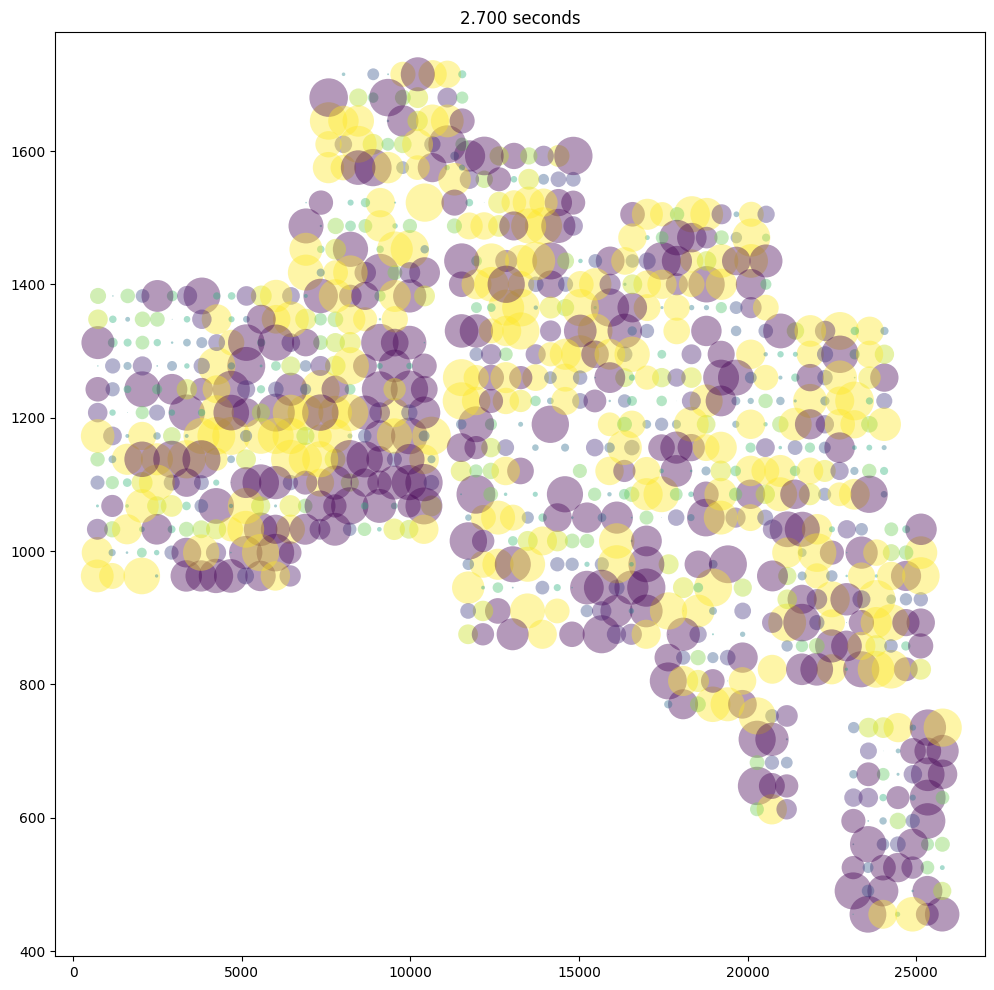

In [61]:
### Gamma Waves instantaneous phase Animation ###
## ca1_gamma_start2000_stop3000_step3
 # First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
gamma_wave = waves["gamma"]
complex_gamma_wave = hilbert(gamma_wave)
inst_phase = np.angle(complex_gamma_wave)
norm = plt.Normalize( vmin= np.mean(inst_phase)-np.std(inst_phase), vmax= np.mean(inst_phase)+np.std(inst_phase) )
scatter = ax.scatter( x, y, c=inst_phase[:,0] , norm=norm, cmap=cm.viridis, s=(np.abs(inst_phase[:,0])**1.8)*100 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,


# animation function.  This is called sequentially
def animate(i):
     scatter.set_array(inst_phase[:,i])
     scatter._sizes = (np.abs(inst_phase[:,i])**1.8)*100
     ax.set_title(f"{i/1000:.3f} seconds")
     return scatter

anim = FuncAnimation(fig, animate, frames=range(2700, 3700, 1), interval=100, blit=False)

In [62]:
anim.save("dev/other/daniel/media/gamma_waves_instantaneous_phase.mp4")

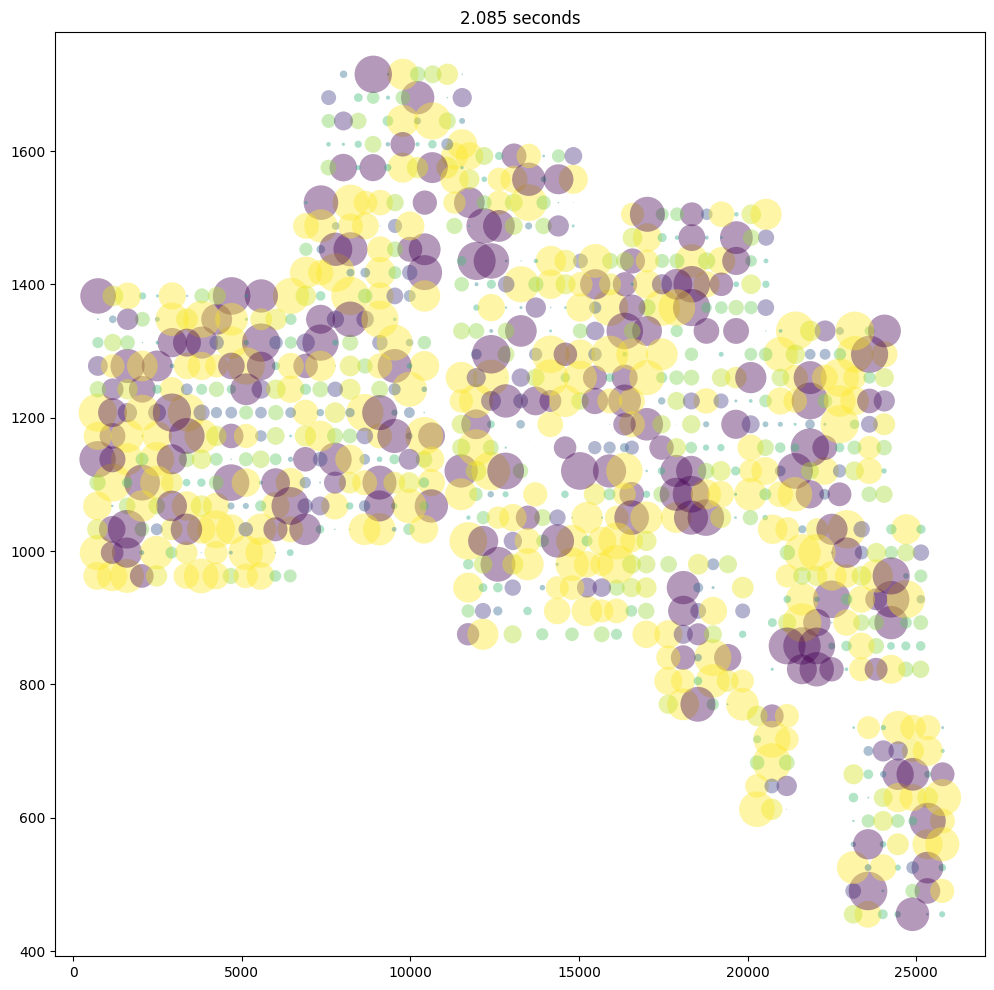

In [42]:
### Basic Waves instantaneous phase Animation ###
## ca1_basic_start2000_stop3000_step3
 # First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
basic_wave = waves["basic"]
complex_basic_wave = hilbert(basic_wave)
inst_phase = np.angle(complex_basic_wave)
norm = plt.Normalize( vmin= np.mean(inst_phase)-np.std(inst_phase), vmax= np.mean(inst_phase)+np.std(inst_phase) )
scatter = ax.scatter( x, y, c=inst_phase[:,0] , norm=norm, cmap=cm.viridis, s=(np.abs(inst_phase[:,0])**1.8)*100 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,


# animation function.  This is called sequentially
def animate(i):
     scatter.set_array(inst_phase[:,i])
     scatter._sizes = (np.abs(inst_phase[:,i])**1.8)*100
     ax.set_title(f"{i/1000:.3f} seconds")
     return scatter

anim = FuncAnimation(fig, animate, frames=range(2085, 2090, 1), interval=100, blit=False)

In [43]:
anim.save("dev/other/daniel/media/basic_waves_instantaneous_phase.mp4")

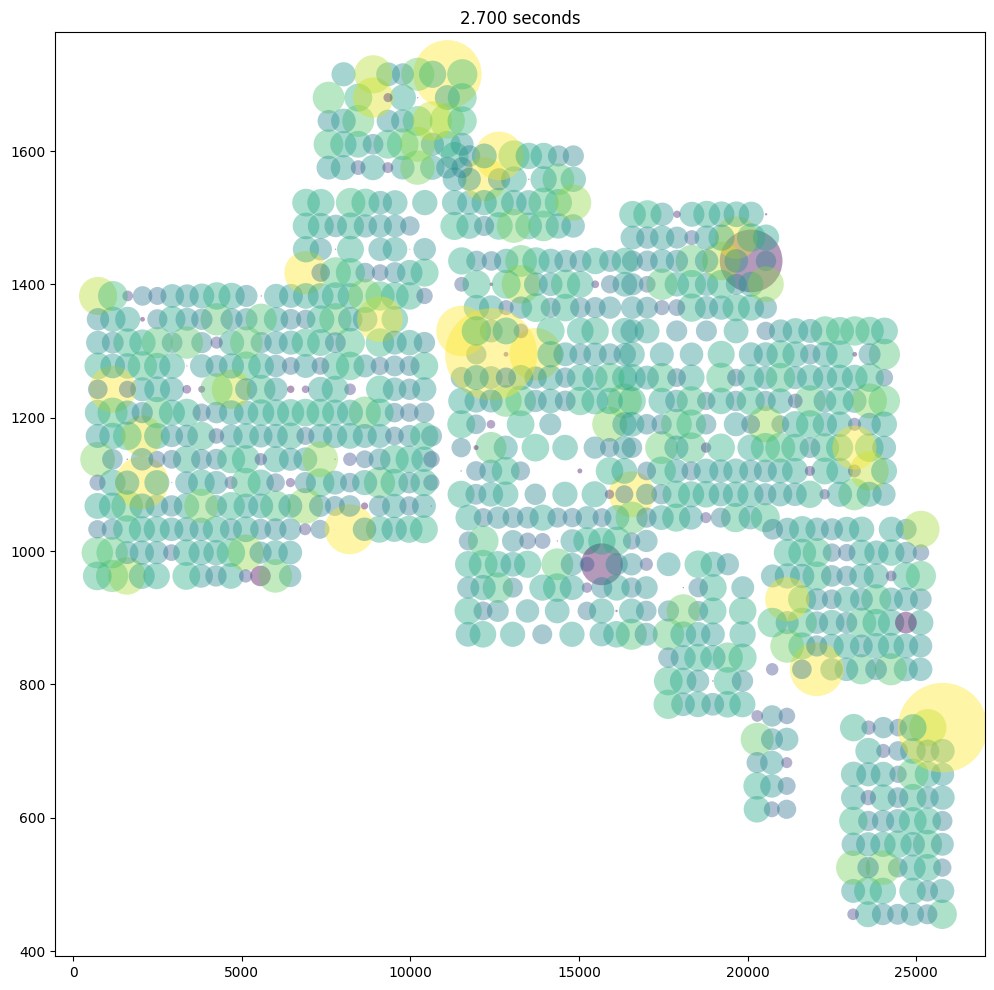

In [66]:
### Theta Waves instantaneous frequency Animation ###
## ca1_theta_start2000_stop3000_step3
 # First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
theta_wave = waves["theta"]
complex_theta_wave = hilbert(theta_wave)
inst_phase = np.angle(complex_theta_wave)
inst_freq = np.diff(np.unwrap(inst_phase))/(2*np.pi)*1000 #inst frequency
norm = plt.Normalize( vmin= np.mean(inst_freq)-np.std(inst_freq), vmax= np.mean(inst_freq)+np.std(inst_freq) )
scatter = ax.scatter( x, y, c=inst_freq[:,0] , norm=norm, cmap=cm.viridis, s=(np.abs(inst_freq[:,0])**2)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,


# animation function.  This is called sequentially
def animate(i):
     scatter.set_array(inst_freq[:,i])
     scatter._sizes = (np.abs(inst_freq[:,i])**2)*10
     ax.set_title(f"{i/1000:.3f} seconds")
     return scatter

anim = FuncAnimation(fig, animate, frames=range(2700, 3700, 1), interval=100, blit=False)



In [67]:
anim.save("dev/other/daniel/media/theta_waves_inst_frequency.mp4")

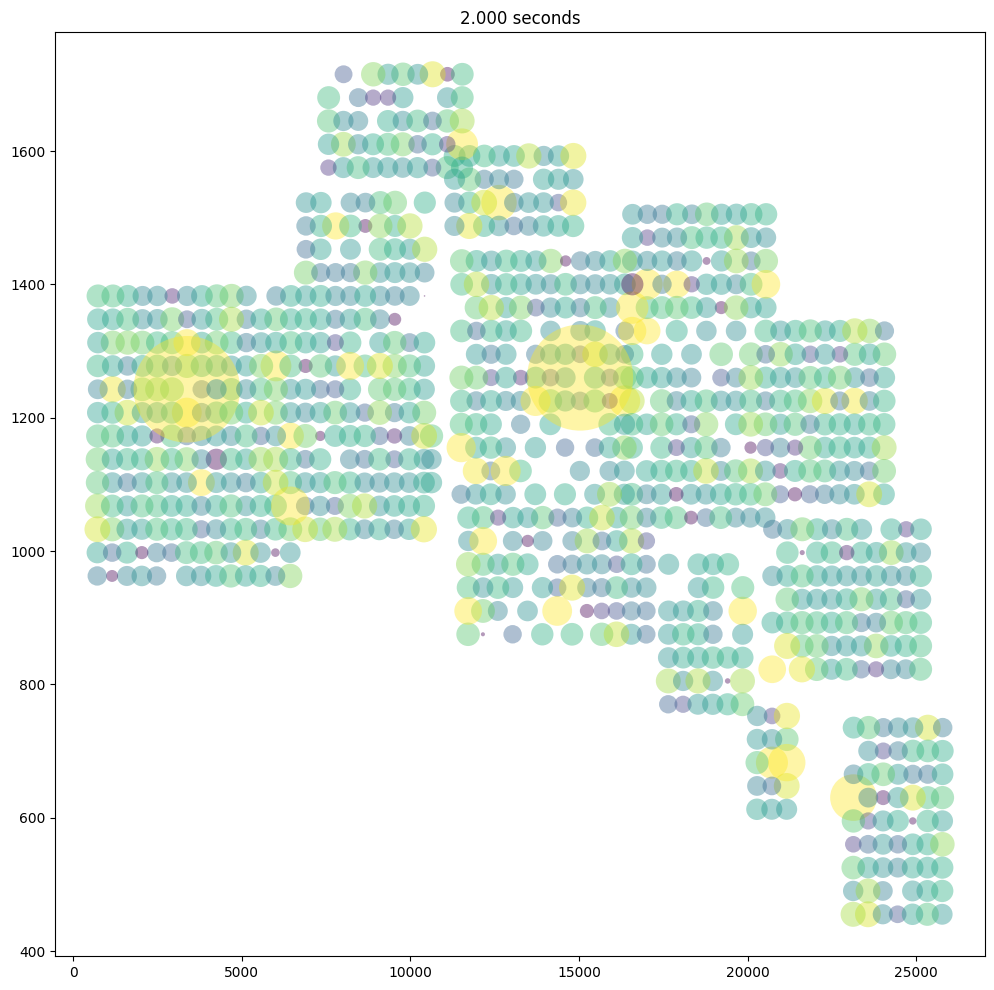

In [46]:
### Gamma Waves instantaneous frequency Animation ###
## ca1_theta_start2000_stop3000_step3
 # First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
gamma_wave = waves["gamma"]
complex_gamma_wave = hilbert(gamma_wave)
inst_phase = np.angle(complex_gamma_wave)
inst_freq = np.diff(np.unwrap(inst_phase))/(2*np.pi)*1000 #inst frequency
norm = plt.Normalize( vmin= np.mean(inst_freq)-np.std(inst_freq), vmax= np.mean(inst_freq)+np.std(inst_freq) )
scatter = ax.scatter( x, y, c=inst_freq[:,0] , norm=norm, cmap=cm.viridis, s=(np.abs(inst_freq[:,0])*1.5) ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,


# animation function.  This is called sequentially
def animate(i):
     scatter.set_array(inst_freq[:,i])
     scatter._sizes = (np.abs(inst_freq[:,i])**1.5)
     ax.set_title(f"{i/1000:.3f} seconds")
     return scatter

anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 1), interval=100, blit=False)
anim.save("dev/other/daniel/media/gamma_waves_inst_frequency.mp4")
 



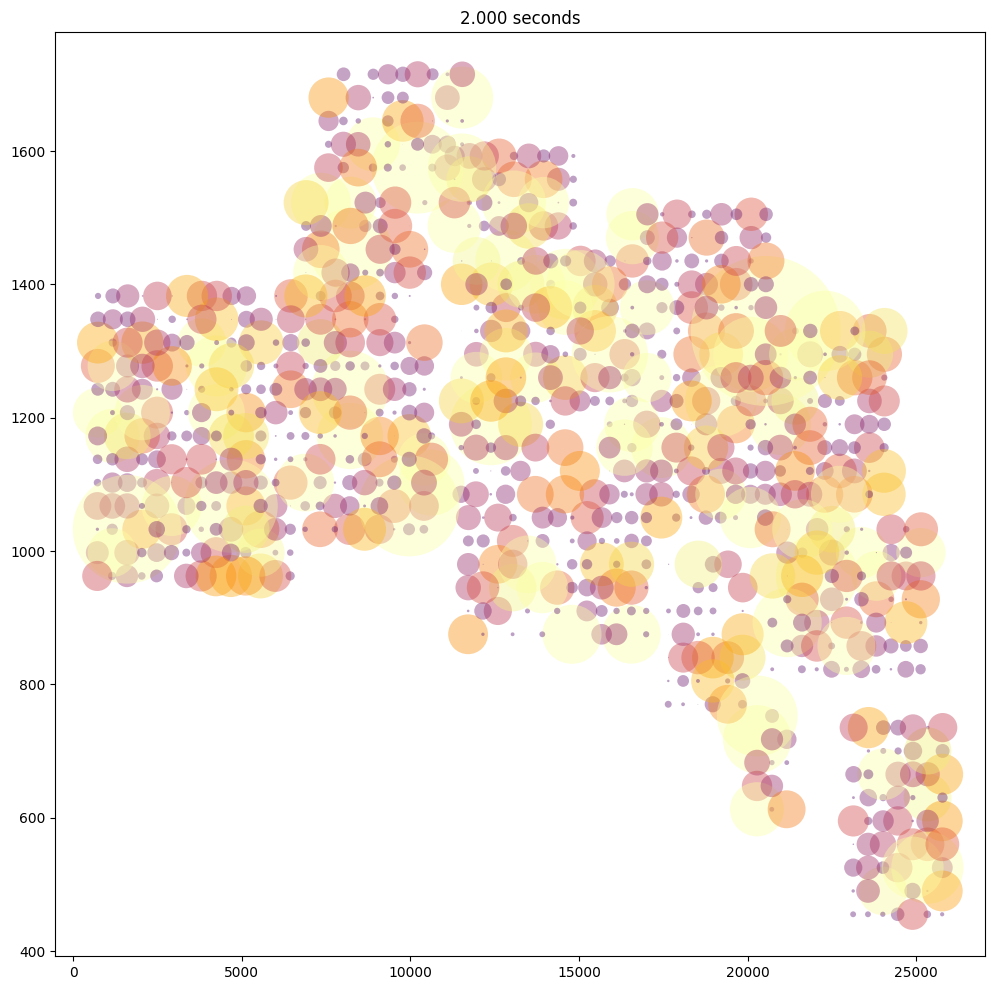

In [47]:
### Power delivered by gamma waves Animation ###
## ca1_theta_start2000_stop3000_step3
 # First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
gamma_wave = waves["gamma"]
power = (gamma_wave**2)/2
#complex_gamma_wave = hilbert(gamma_wave)
#inst_phase = np.angle(complex_gamma_wave)
norm = plt.Normalize( vmin= np.mean(power)-np.std(power), vmax= np.mean(power)+np.std(power) )
scatter = ax.scatter( x, y, c=power[:,0] , norm=norm, cmap=cm.inferno, s=(power[:,0])*1000 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,


# animation function.  This is called sequentially
def animate(i):
     scatter.set_array(power[:,i])
     scatter._sizes = (power[:,i])*1000
     ax.set_title(f"{i/1000:.3f} seconds")
     return scatter

anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 10), interval=100, blit=False)
anim.save("dev/other/daniel/media/gamma_waves_power.mp4")



### <font color="blue"> Saved Examples

These are animations I like

[[ 1.03863968e+00  1.13139754e+00  1.22257681e+00 ... -1.22532002e-03
  -1.05124637e-03 -8.96969916e-04]
 [-5.62921678e-01 -3.61159471e-01 -1.58198631e-01 ...  4.11711642e-05
   3.72480084e-05  3.33729157e-05]
 [ 2.23429526e+00  2.38988874e+00  2.54342748e+00 ...  8.85226991e-04
   7.64663480e-04  6.56865682e-04]
 ...
 [-5.86447801e-01 -3.87312521e-01 -1.87660435e-01 ...  2.09295603e-03
   1.81006484e-03  1.55660150e-03]
 [ 1.42783579e+00  1.36061344e+00  1.29121848e+00 ... -9.21328388e-04
  -7.93704795e-04 -6.79978306e-04]
 [-3.04814477e+00 -2.97276103e+00 -2.89363960e+00 ...  1.10049028e-04
   1.07256464e-04  1.02366800e-04]]


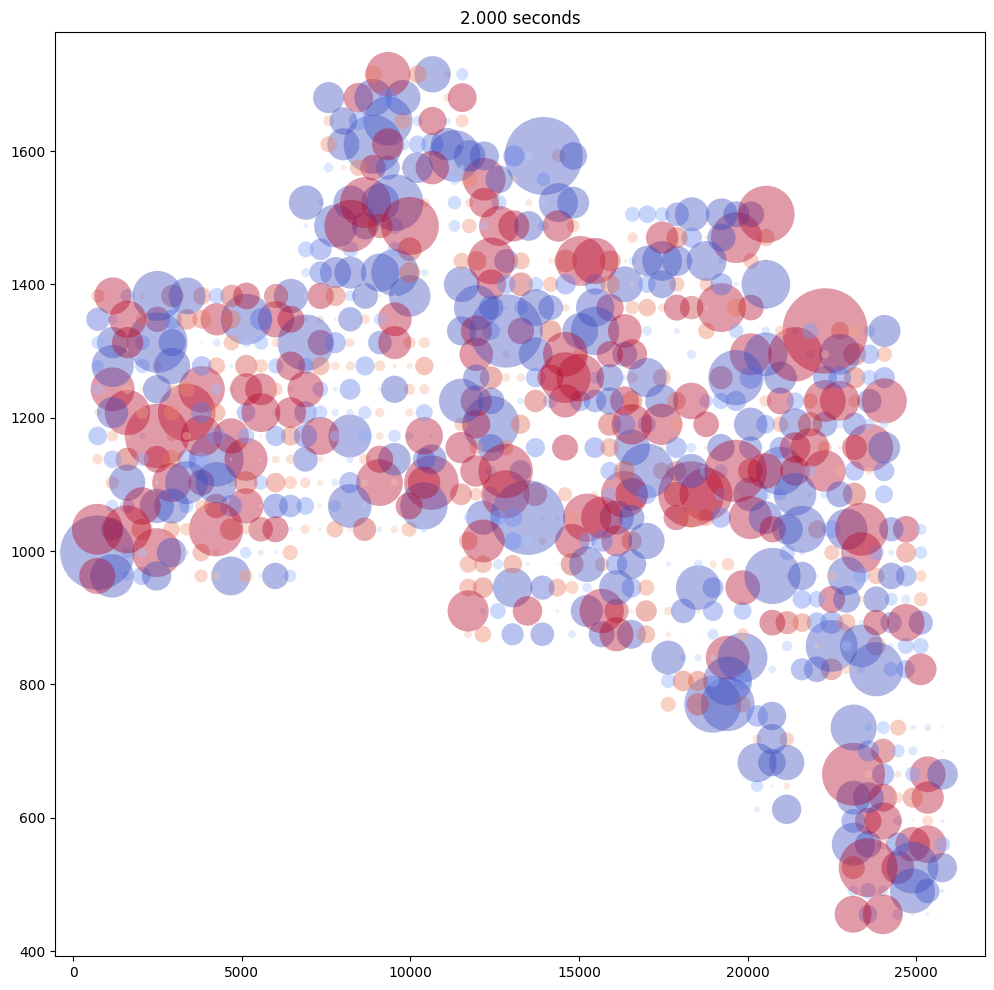

In [23]:
### Theta Waves Animation ###
## ca1_theta_start2000_stop3000_step3
 # First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["theta"]
print(data)
#complex_data = hilbert(waves["theta"][1,:])
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*100 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,


# animation function.  This is called sequentially
def animate(i):
     scatter.set_array(data[:,i])
     scatter._sizes = (np.abs(data[:,i])**1.8)*100
     ax.set_title(f"{i/1000:.3f} seconds")
     return scatter

anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)
anim.save("dev/other/daniel/media/theta_waves.mp4")



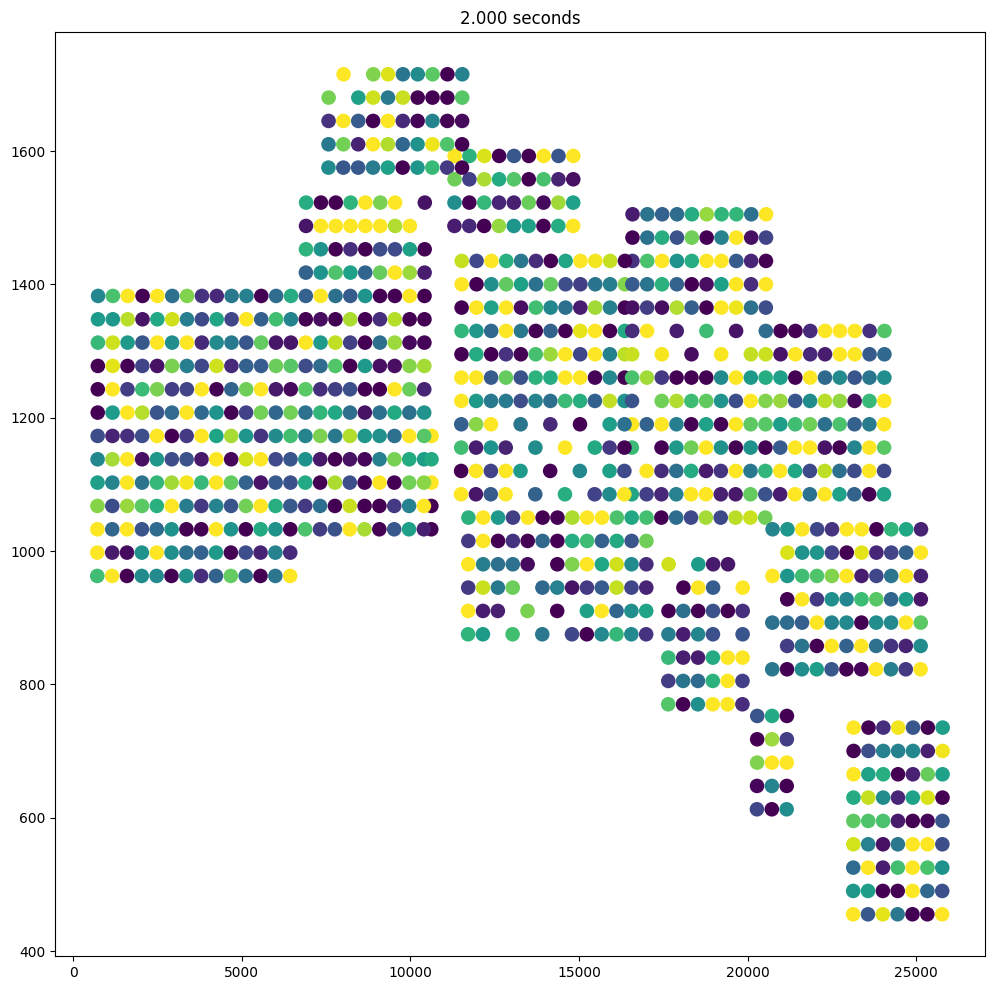

In [48]:
theta_wave = waves["theta"]
gamma_wave = waves["gamma"]
instantaneous_phase = np.angle(hilbert(gamma_wave))
instantaneous_amplitude = np.abs(hilbert(theta_wave))
#print(instantaneous_phase)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
norm = plt.Normalize( vmin= np.mean(instantaneous_amplitude)-np.std(instantaneous_amplitude), vmax= np.mean(instantaneous_amplitude)+np.std(instantaneous_amplitude) )
scatter = ax.scatter( x, y, c=instantaneous_amplitude[:,0] , norm=norm, cmap=cm.viridis, s=110, edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,
#phasor = ax.quiver(x, y, 9*np.cos(instantaneous_phase[:, 0]), 9*np.sin(instantaneous_phase[:, 0]))

# animation function.  This is called sequentially
def animate(i):
    # Update the colors and sizes based on the instantaneous phase
    phases = instantaneous_phase[:, i]
    amplitudes = instantaneous_amplitude[:, i]
    scatter.set_array(amplitudes)  # Update colors
    #scatter._sizes = (np.abs(amplitudes)**2) * 50  # Update sizes, with an appropriate scale factor
    #phasor.set_UVC(9*np.cos(instantaneous_phase[:, i]), 9*np.sin(instantaneous_phase[:, i]))
    #phasor.set_color(cm.inferno(phases))
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)
anim.save("dev/other/daniel/media/theta_waves_phases.mp4")

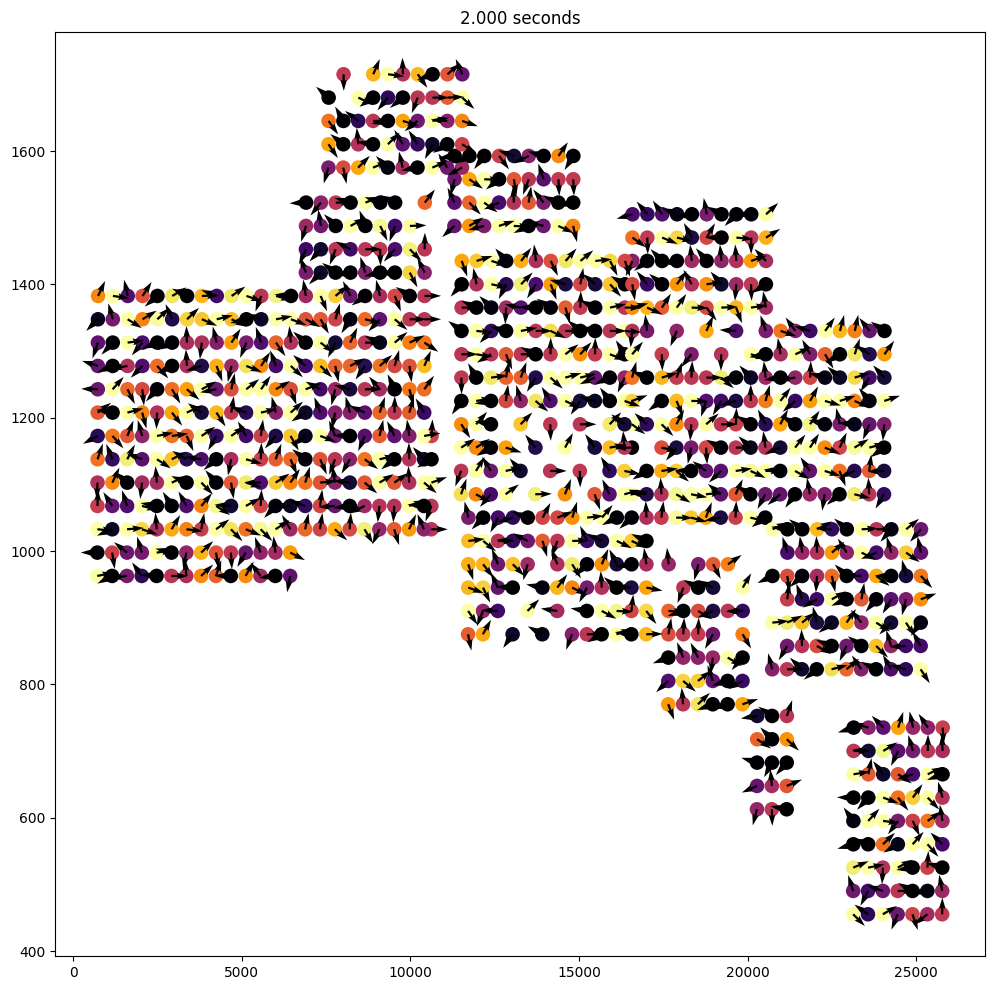

In [68]:
theta_wave = waves["theta"]
gamma_wave = waves["theta"]
instantaneous_phase = np.angle(hilbert(gamma_wave))
instantaneous_amplitude = np.abs(hilbert(theta_wave))
#print(instantaneous_phase)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
norm = plt.Normalize( vmin= np.mean(theta_wave)-np.std(theta_wave), vmax= np.mean(theta_wave)+np.std(theta_wave) )
scatter = ax.scatter( x, y, c=theta_wave[:,0] , norm=norm, cmap=cm.inferno, s=110, edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,
phasor = ax.quiver(x, y, 9*np.cos(instantaneous_phase[:, 0]), 9*np.sin(instantaneous_phase[:, 0]))

# animation function.  This is called sequentially
def animate(i):
    # Update the colors and sizes based on the instantaneous phase
    phases = instantaneous_phase[:, i]
    waves = theta_wave[:, i]
    scatter.set_array(waves)  # Update colors
    #scatter._sizes = (np.abs(amplitudes)**2) * 50  # Update sizes, with an appropriate scale factor
    phasor.set_UVC(9*np.cos(instantaneous_phase[:, i]), 9*np.sin(instantaneous_phase[:, i]))
    #phasor.set_color(cm.inferno(phases))
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)
anim.save("dev/other/daniel/media/theta_waves_phases.mp4")




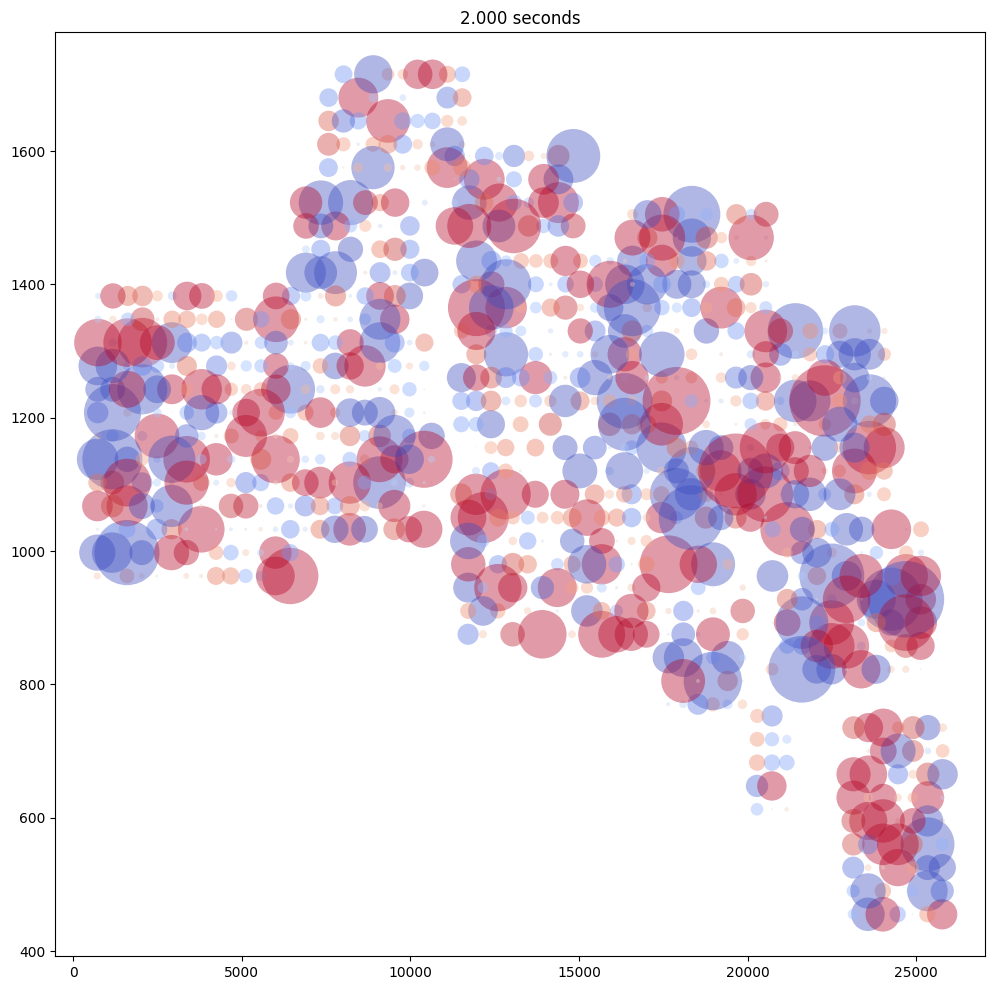

In [49]:
### Delta Waves Animation ###
## ca1_delta_start2000_stop3000_step3
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["delta"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    scatter._sizes = (np.abs(data[:,i])**1.8)*20
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)
anim.save("dev/other/daniel/media/delta_waves_phases.mp4")

In [ ]:
### Alpha Waves Animation ###
## ca1_alpha_start2500_stop2800_step1
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["alpha"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**2)*100
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)

In [ ]:
### Beta Waves Animation ###
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["beta"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**2)*90
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2500, 2800, 1), interval=100, blit=False)

In [ ]:
### Long Alpha Animation
# ca1_alpha_start2700_stop5000_step1
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["alpha"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**2.3)*80
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2700, 5000, 3), interval=100, blit=False)  #5700

## <font color="blue"> Multi Plots

In [17]:
start_time = 2700 + 120 * 1000
end_time = 5000 + 120 * 1000

# make smaller spike train of only spikes in time window
small_train = []
for i_train in sd.train:
    small_train.append( i_train[ (i_train > start_time) & (i_train < end_time) ] )

In [18]:
neurons_by_time = []
for i in range(start_time, end_time):                                   # loop over time
    firing_neurons = []
    for i2 in range(len(small_train)):                                   # loop over neurons
        if len(small_train[i2]) > 0:                                     # if neuron fires at all
            if np.sum( np.abs( small_train[i2] - i ) < 25 ):             # if neuron fires within at least once within 50 ms of time i
                #neuron_x.append( sd.neuron_data[0][i2]['position'][0] )  # add neuron x/y locations to list
                #neuron_y.append( sd.neuron_data[0][i2]['position'][1] )
                firing_neurons.append( i2 )
    neurons_by_time.append( firing_neurons )

In [19]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

/tmp/ipykernel_762/3713121702.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


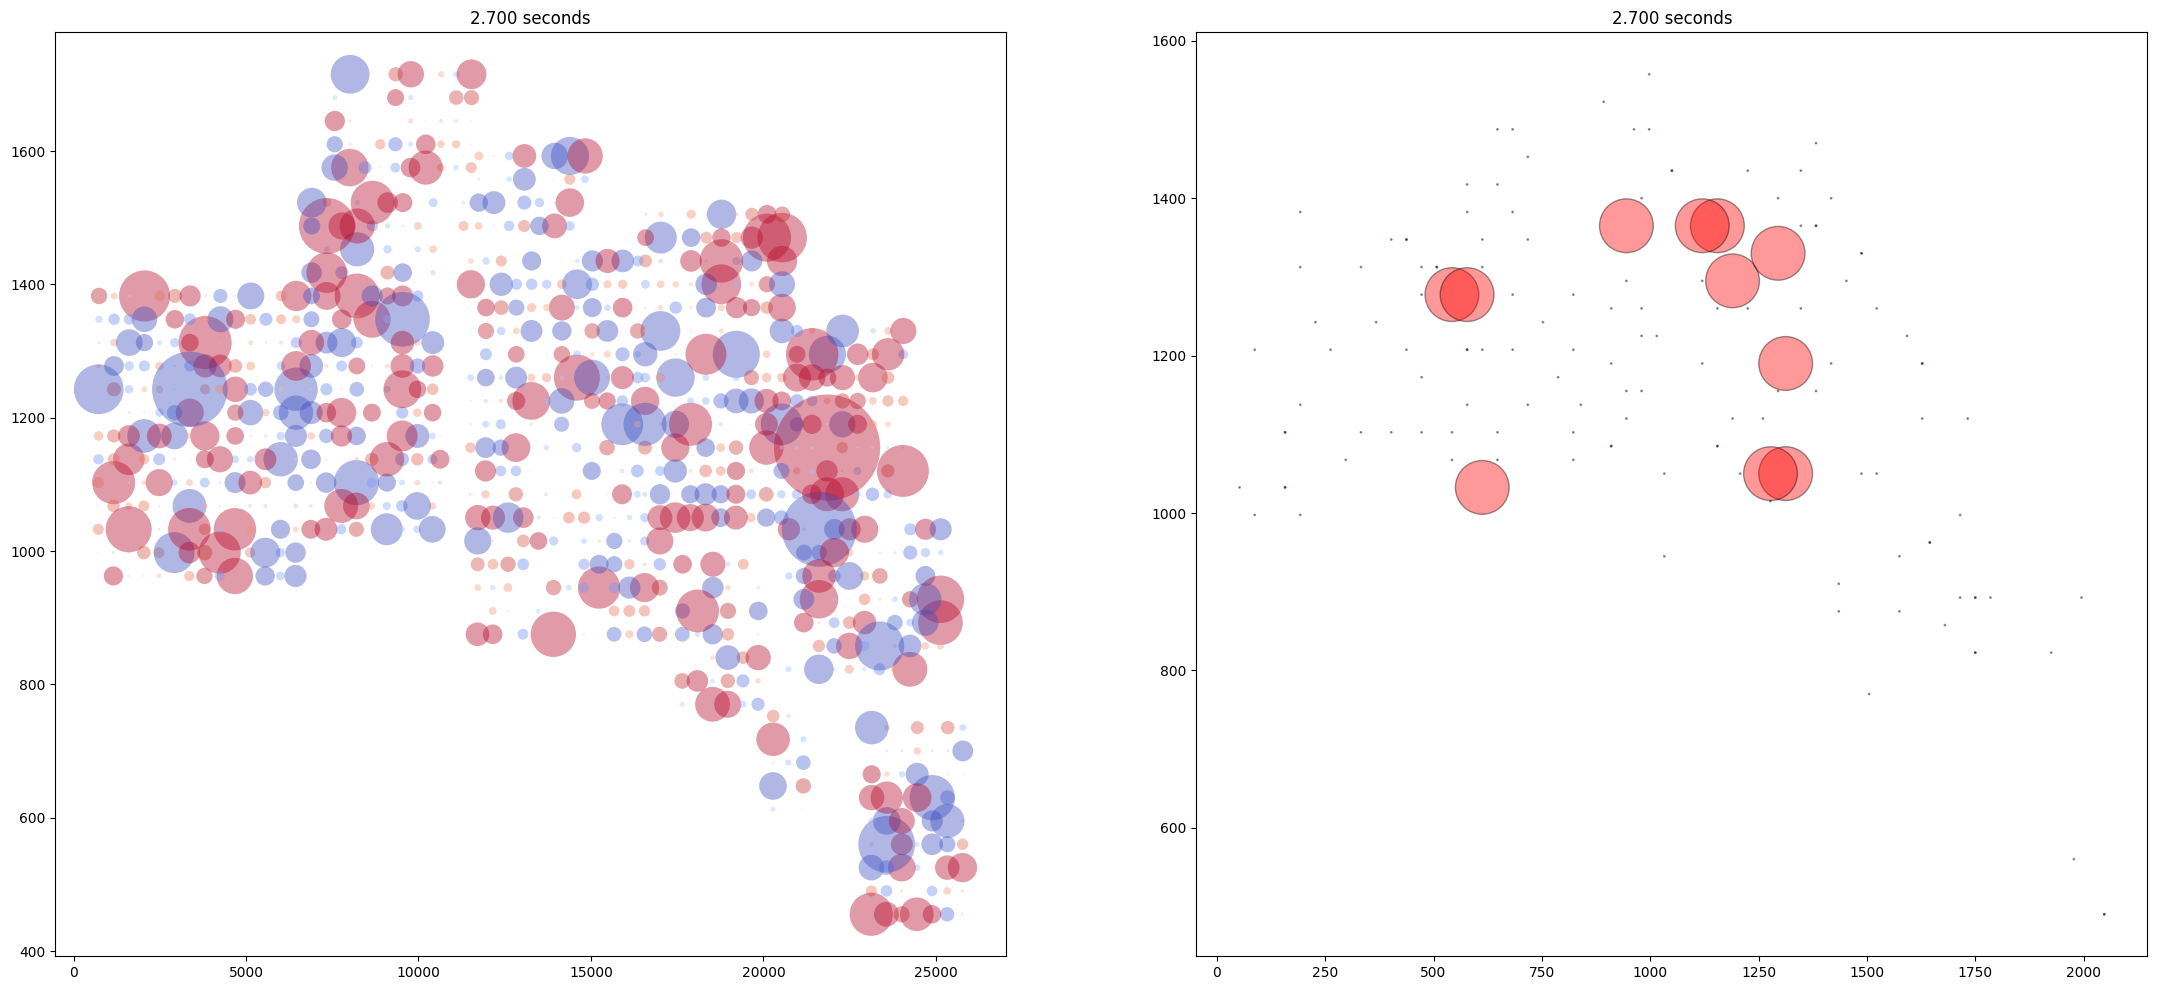

In [20]:
### Long Alpha Animation
# ca1_alpha_start2700_stop5700_step1
# First set up the figure, the axis, and the plot element we want to animate
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))
#ax = plt.axes()

# Waves plot
data = waves["alpha"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
plot0 = plots[0].scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# Footpring plot
plot1 = plots[1].scatter( neuron_y , neuron_x, c="red", s=np.ones(sd.N),  alpha=.4,  edgecolor='black' )

# animation function.  This is called sequentially
def animate(i):
    # Waves plot
    plot0.set_array(data[:,i])
    plot0._sizes = (np.abs(data[:,i])**2.3)*80
    plots[0].set_title(f"{i/1000:.3f} seconds")
    #plots[0].set_xlim(0,27000)
    #plots[0].set_ylim(400,1800)

    # Raster Plot
    neuron_sizes=  np.ones(sd.N) 
    neuron_sizes[ neurons_by_time[i-2700] ] = 1500
    plot1._sizes = neuron_sizes
    plots[1].set_title(f"{i/1000:.3f} seconds")
    #plots[1].set_xlim(0,27000)
    #plots[1].set_ylim(400,1800)
    return plots

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2700, 3000, 3), interval=100, blit=False)  #5700

In [ ]:
anim.save("media/multiplot.mp4")